In [1]:
id1 = "318510070"
id2 = "206073124"

name_student_1 = "Amit, Fallach"
name_student_2 = "Linoy ,Medalsy "

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame([id1,id2])
df = pd.DataFrame([id1])
df.to_clipboard(index=False,header=False)

In [2]:
file1 = "https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"
youtubedata = pd.read_csv(file1)
youtubedata.head(1)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


solution to question 1 : We will save the index of the maximum value from the column "Views" and then print the line with the columns we want.

In [3]:
inxrow = youtubedata["views"].idxmax()
youtubedata.iloc[[inxrow]][['title', 'publish_time', 'views']]


,title,publish_time,views
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06T17:58:51.000Z,149376127


solution to question 2 : We will use "groupby" to take the "channel_title" and extract the maximum value from them through the views column, then we will arrange the values with "sort_vlues" take the big 3 and print them

In [4]:
channel = youtubedata.groupby("channel_title")[["views"]].max()
channel.sort_values("views").tail(3)

,views
channel_title,
Marvel Entertainment,91933007
LuisFonsiVEVO,102012605
YouTube Spotlight,149376127


solution to question 3 : We create a correlation by Spearman

In [5]:
cor123 = youtubedata[["comment_count","views","dislikes","likes"]].corr(method = "spearman")
cor123

,comment_count,views,dislikes,likes
comment_count,1.000000,0.840532,0.843331,0.881849
views,0.840532,1.000000,0.866979,0.877789
dislikes,0.843331,0.866979,1.000000,0.801154
likes,0.881849,0.877789,0.801154,1.000000


solution to question 4 : We create a heat map

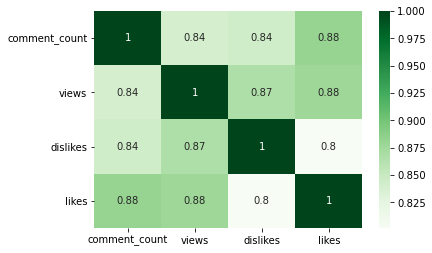

In [6]:
sns.heatmap(data = cor123,  cmap='Greens',annot = True) 

solution to question 5 : present the 2 strongest correlations from Section 3

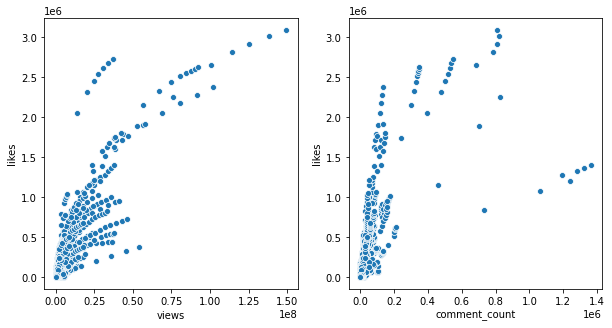

In [7]:
# create matrix of plots
fig, axes = plt.subplots(1, 2,figsize = (10,5))

#take the 4 largest values (each value appears twice)
cor456 = cor123.unstack().sort_values()[-8:-4]

#create a list of tapels names with the wanted values.
taplist = pd.Series.keys(cor456)

#create scatterplots according to the indexes of the tapels list
plt1 = sns.scatterplot(ax = axes[0],data=youtubedata, x=taplist[0][0], y=taplist[0][1])
plt2 = sns.scatterplot(ax = axes[1],data=youtubedata, x=taplist[2][0], y=taplist[2][1])

solution to question 5 : first we use "DatetimeIndex" To set the value of a year as a time, after that we build a table using "pivot_table:",
as a last step we will take 2017-2018 with "groupby".

In [8]:
youtubedata['year'] = pd.DatetimeIndex(youtubedata['publish_time']).year
yutpivot = youtubedata.pivot_table("views",index='category_id',columns = "year", aggfunc='sum').copy()
yutpivot.groupby("category_id")[[2017,2018]].sum()

year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0
